In [1]:
import numpy as np                                             
import pandas as pd                                           
import matplotlib.pyplot as plt                                  
import seaborn as sns                                            
%matplotlib inline
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from subprocess import check_output
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
avocado = pd.read_csv(r"C:/Users/Sadyo/Desktop/DataTrained/avocado.csv")
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado.shape

(18249, 14)

In [4]:
#The Feature "Unnamed:0" is the index column, so it can be removed:

avocado.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Dataset is not having any missing values (18249 complete data) and 13 columns out of which AveragePrice is the target variable.

In [6]:
## splitting Date Feature into day and month columns :

avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado['Day']=avocado['Date'].apply(lambda x:x.day)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Dataset has been checked for null values. Now will take a look into the distribution of variables and checking for outliers.

In [7]:
# now, renaming the variables for ease of understanding and better prsentation

avocado.rename(columns={'AveragePrice':'AvgPrice',
                        'type':'Type',
                        'year': 'Year',
                        'region':'Region',
                        '4046':'Small HASS sold',
                        '4225':'Large HASS sold',
                        '4770':'XLarge HASS sold'}, 
                 inplace=True)
avocado.columns

Index(['Date', 'AvgPrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'Type', 'Year', 'Region', 'Month', 'Day'],
      dtype='object')

In [8]:
avocado['Type'].unique()

array(['conventional', 'organic'], dtype=object)

In [9]:
# sorting data by date which would help in observing data better:

avocado_1 = avocado.sort_values("Date")
avocado.head()

,Date,AvgPrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price Per Month')

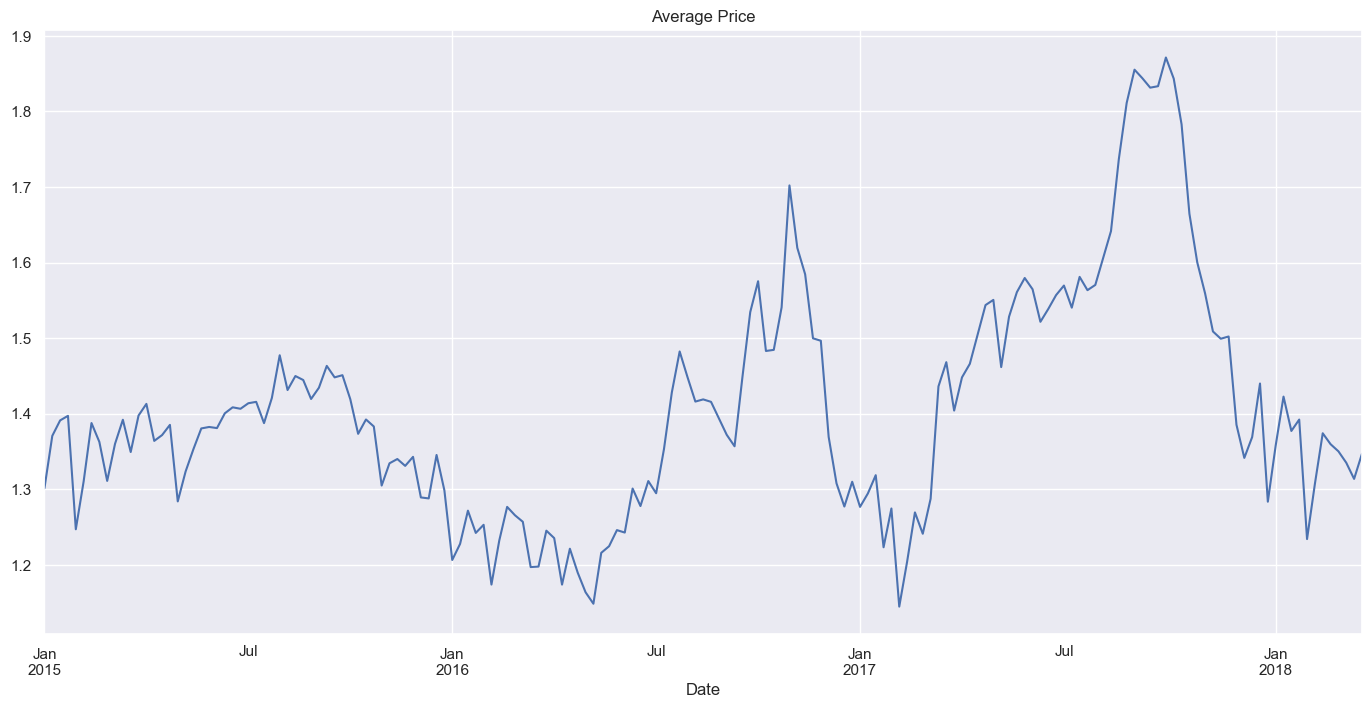

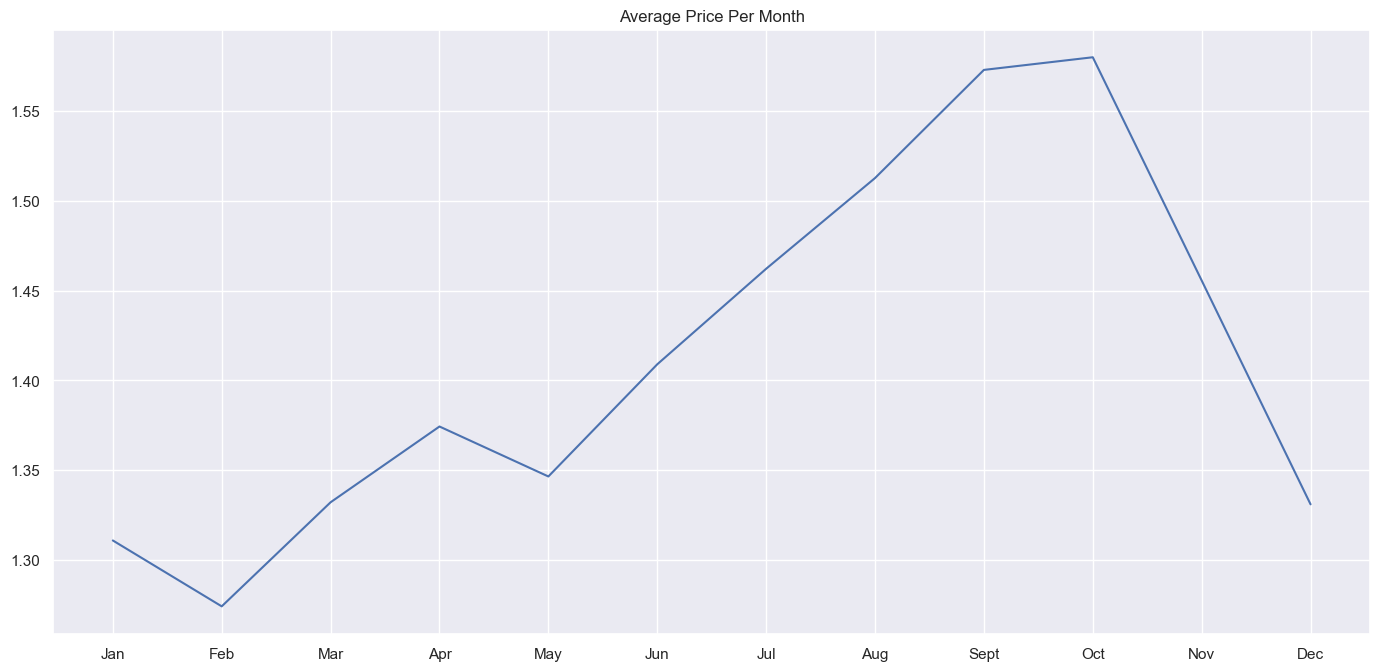

In [10]:
# analyzing average price of avocado with respect to time:

#1. By Date:
byDate=avocado.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AvgPrice'].plot()
plt.title('Average Price')

#2. By month:
byMonth = avocado.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AvgPrice'])
plt.title('Average Price Per Month')

Oservations:
    1. By Date: Here it can be seen that with increase in years(from 2015 to 2018) there is increase in Average Price of     Avocado. Also Average price has a deep fall at the ending of the years.
    2. By Month: Highest price is in the period of september to october, and lowest price of avocado is in the month of February.   

Text(0.5, 1.0, 'Average Price According to Region')

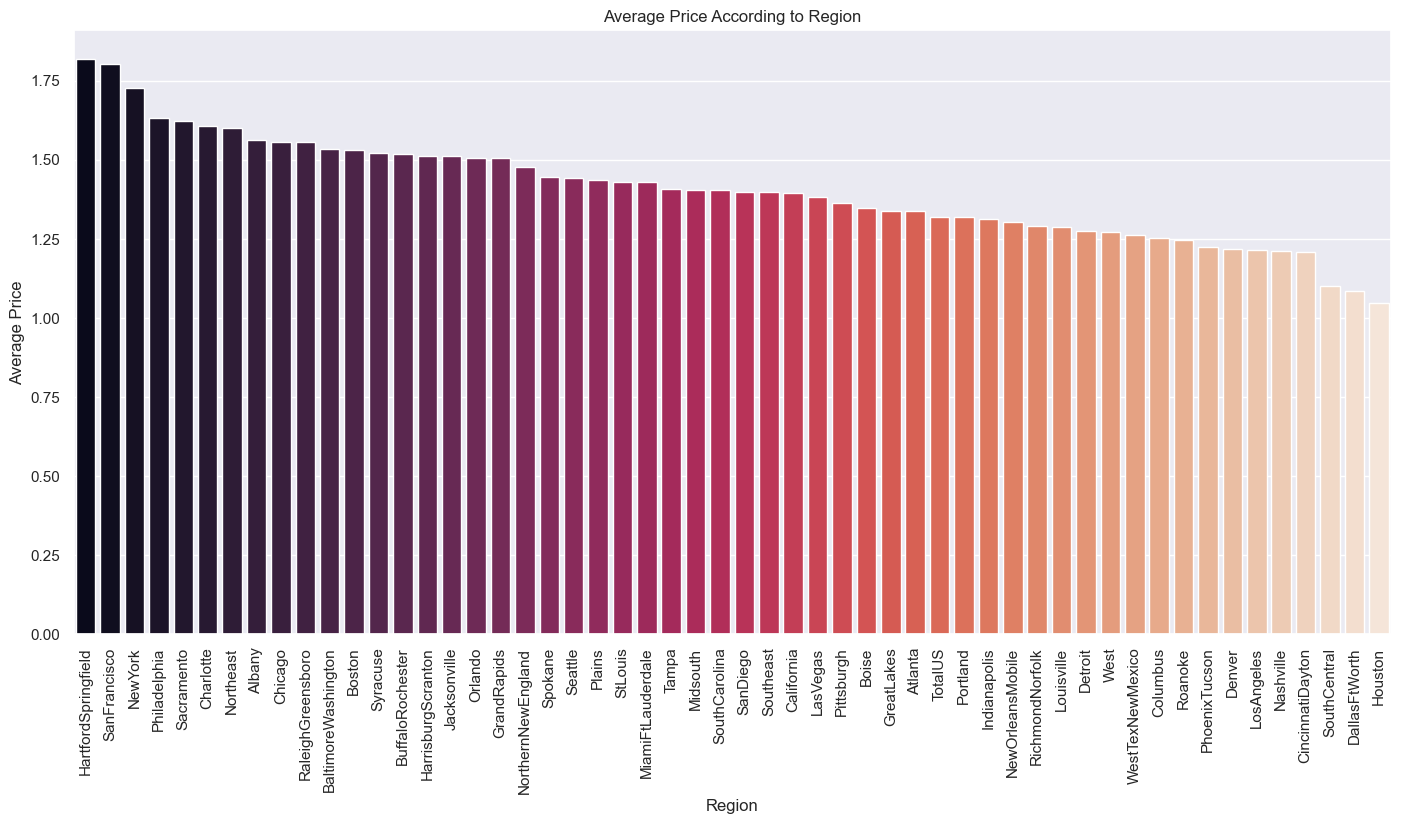

In [11]:
# Analyzing the price of avocado by region:

byRegion=avocado.groupby('Region').mean()
byRegion.sort_values(by=['AvgPrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AvgPrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

From above it can be observed that highest average price of avocado is at HartfordSpringfield followed by SanFrancisco and NewYork.

C:\Users\Sadyo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distribution of average price', ylabel='Density'>

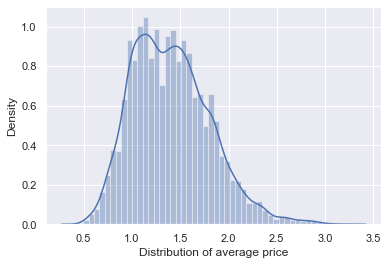

In [51]:
# Now, checking the distribution of target variable (AvgPrice):

sns.distplot(avocado["AvgPrice"],axlabel="Distribution of average price")

A big portion of Average Price of avocado is lying within the range 1.0 to 1.7

Text(0.5, 1.0, 'Average Price As per Type of Avocado')

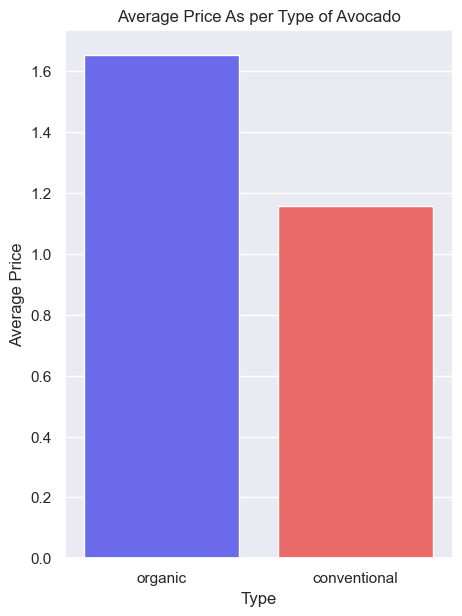

In [12]:
byType=avocado.groupby('Type').mean()
byType.sort_values(by=['AvgPrice'], ascending=False, inplace=True)
plt.figure(figsize=(5,7),dpi=100)
sns.barplot(x = byType.index,y=byType["AvgPrice"],data = byType,palette='seismic')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price As per Type of Avocado')

 Average Price of organic avocado is significantly high.

In [13]:
# dropping the Date column as it is no longer required:
avocado.drop('Date', axis=1, inplace = True)

# converting type into numerical values:
avocado['Type'].replace(to_replace='conventional', value = '1', inplace=True)
avocado['Type'].replace(to_replace='organic', value = '0', inplace=True)

In [16]:
cat_feature = ['Region']
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature 'Region' column:

avocado[cat_feature] = avocado[cat_feature].apply(lambda col: le.fit_transform(col))    


In [30]:
avocado_new = pd.get_dummies(avocado, columns = cat_feature)

In [31]:
avocado_new.head()

,AvgPrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,...,Region_44,Region_45,Region_46,Region_47,Region_48,Region_49,Region_50,Region_51,Region_52,Region_53
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
avocado_new.columns

Index(['AvgPrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold',
       'XLarge HASS sold', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'Type', 'Year', 'Month', 'Day', 'Region_0', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'Region_10', 'Region_11', 'Region_12',
       'Region_13', 'Region_14', 'Region_15', 'Region_16', 'Region_17',
       'Region_18', 'Region_19', 'Region_20', 'Region_21', 'Region_22',
       'Region_23', 'Region_24', 'Region_25', 'Region_26', 'Region_27',
       'Region_28', 'Region_29', 'Region_30', 'Region_31', 'Region_32',
       'Region_33', 'Region_34', 'Region_35', 'Region_36', 'Region_37',
       'Region_38', 'Region_39', 'Region_40', 'Region_41', 'Region_42',
       'Region_43', 'Region_44', 'Region_45', 'Region_46', 'Region_47',
       'Region_48', 'Region_49', 'Region_50', 'Region_51', 'Region_52',
       'Region_53'],
      dtype='object')

In [33]:
y = avocado_new['AvgPrice']
x = avocado_new.drop(columns = ['AvgPrice'])


In [43]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state, test_size = 0.33)


In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(train_x)
x_test=sc.transform(test_x)

In [45]:
import sklearn.metrics as metrics

def regression_results(train_y, y_pred):
    explained_variance=metrics.explained_variance_score(train_y, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(train_y, y_pred) 
    mse=metrics.mean_squared_error(train_y, y_pred) 
    r2=metrics.r2_score(train_y, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(train_y)-1)/(len(train_y)-x_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [46]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score
def model_accuracy(model,x_train=x_train,y_train=train_y):
    accuracies = cross_val_score(estimator = model, X = x_train, y = train_y, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [48]:
# Fitting Linear Regression Model:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(x_train,train_y)
y_pred = regressor.predict(x_test)
regression_results(test_y,y_pred)
model_accuracy(regressor)

Explained_variance:  0.5783
R2:  0.5783
Adjusted_r2:  0.5736
MAE:  0.1962
MSE:  0.0671
RMSE:  0.2591
Accuracy: 59.15 %
Standard Deviation: 1.97 %


In [49]:
#Fitting Random Forest Regression Model

classifier = RandomForestRegressor()
classifier.fit(x_train, train_y)
y_pred_rf = classifier.predict(x_test)
regression_results(test_y,y_pred_rf)
model_accuracy(classifier)

Explained_variance:  0.8883
R2:  0.8883
Adjusted_r2:  0.8871
MAE:  0.0941
MSE:  0.0178
RMSE:  0.1333
Accuracy: 88.88 %
Standard Deviation: 0.74 %


In [50]:
#Fitting Decision Tree Regression Model

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(x_train, train_y)
y_pred_dt = decision_tree.predict(x_test)
regression_results(test_y,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.8151
R2:  0.8151
Adjusted_r2:  0.8131
MAE:  0.1132
MSE:  0.0294
RMSE:  0.1715
Accuracy: 82.22 %
Standard Deviation: 1.37 %


Random forest model is the best fit model to predict average avocado prices.